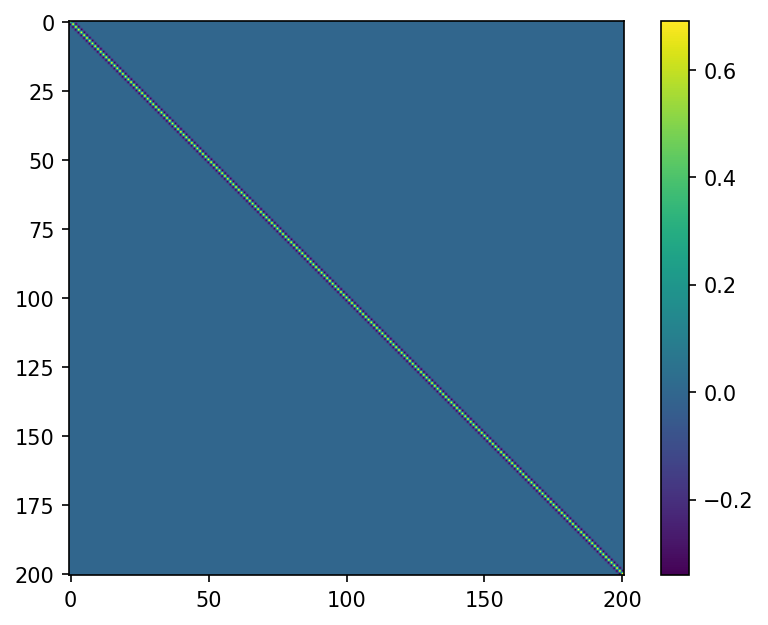

0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.691412411553888
0.6822249506005971
0.6822249506005971
0.6822249506005971
0.68222

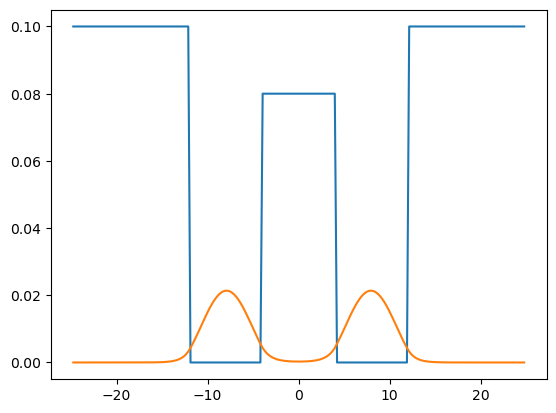

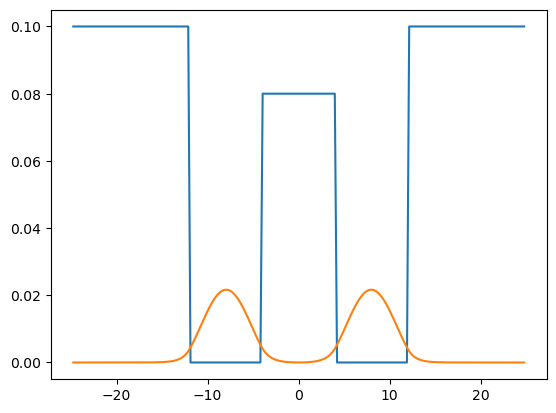

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import eigh
# import numba as nb

E_H = 27.211
ENERGY_CONVERSION = E_H * 1000
DISTANCE_CONVERSION = .05292
F_CONVERSION = E_H / DISTANCE_CONVERSION / 1e-4
# [nm] -> [au] x / conversion
# [au] -> [nm] x * conversion
# [meV] -> [au] e / conversion
# [au] -> [meV] e * conversion
# [kV/cm] -> [au] F / conversion
# [au] -> [kV/cm] F * conversion

n = 201
mass = 0.067
a = 25 / DISTANCE_CONVERSION # [nm] -> [au]
d1 = 12 / DISTANCE_CONVERSION # [nm] -> [au]
d2 = 4 / DISTANCE_CONVERSION # [nm] -> [au]
V1 = 250 / ENERGY_CONVERSION # [meV] -> [au]
V2 = 200 / ENERGY_CONVERSION # [meV] -> [au]
dx = 2*a / (n+1)
alpha = 1/(2*mass*dx**2)
omega = 1

F = 0 / F_CONVERSION

# make lookup tables instead of functions
xi = [-a + dx*(i+1) for i in np.arange(n)]
V_w = [0.0] * n
for i in range(n):
    if xi[i] < -d1:
        V_w[i] = V1
        continue
    if xi[i] >= -d2 and xi[i] <= d2:
        V_w[i] = V2
        continue
    if xi[i] > d1:
        V_w[i] = V1

V = lambda _i, _tm = 0 : V_w[_i] + F * xi[_i]

def applyHop(_Psi, _tm = 0):
    _psi_new = np.zeros(_Psi.size) + 0j
    _psi_new[0] = -(_Psi[1]-2*_Psi[0])/(2*mass*dx**2) + V(0, _tm)*_Psi[0]
    _psi_new[-1] = -(_Psi[-2]-2*_Psi[-1])/(2*mass*dx**2) + V(-1, _tm)*_Psi[-1]
    for i in range(1, n-1):
        _psi_new[i] = -(_Psi[i+1]+_Psi[i-1]-2*_Psi[i]) / (2*mass*dx**2) + V(i, _tm)*_Psi[i]
    return _psi_new

H_mat = np.zeros((n,n))
for i in range(n):
    # diagonal
    H_mat[i,i] = 2*alpha + V_w[i] + F*xi[i]
    # above and under diagonal
    if (i > 0):
        H_mat[i-1,i] = -alpha
        H_mat[i,i-1] = -alpha

plt.figure(dpi=150)
plt.imshow(H_mat)
plt.colorbar()
plt.show()
for i in range(n):
    print(2*alpha + V_w[i] + F*xi[i])

eigvals, eigvecs = eigh(H_mat)
Psi_base = eigvecs[:,0].T.copy() + 0.0j
# obliczenia pierwszego stanu t_0 - Crank-Nicolson

dt = 1
m = 0
tm = dt * m
Psi_k = Psi_base.copy()
Psi_prim = np.zeros(n) + 0.0j
for j in range(10):
    Psi_prim = applyHop(Psi_base, tm) + applyHop(Psi_k, tm+dt)
    for i in range(n):
        Psi_k[i] = Psi_base[i] + dt / (2.0j) * Psi_prim[i]

Psi_t0 = Psi_base.copy()
Psi_t1 = Psi_k.copy()

def HPsi(_Psi, _t):
    psi = np.zeros(n)+0j
    psi[0] = -alpha*(_Psi[1]-2*_Psi[0]) + V_w[0]*_Psi[0] + F*xi[0]*math.sin(omega*_t)*_Psi[0]
    psi[-1] = -alpha*(_Psi[-2]-2*_Psi[-1]) + V_w[-1]*_Psi[-1] + F*xi[-1]*math.sin(omega*_t)*_Psi[-1]
    for i in range(1, n-1):
        psi[i] = -alpha*(_Psi[i+1]+_Psi[i-1]-2*_Psi[i]) + V_w[i]*_Psi[i] + F*xi[i]*math.sin(omega*_t)*_Psi[i]
    return psi

def AskaraCakmak(psi_m_1, psi_0, _t):
    return psi_m_1 + 2*dt/(1j)*HPsi(psi_0, _t)

plt.plot([xi[i]*DISTANCE_CONVERSION for i in range(n)], [V(i)*ENERGY_CONVERSION/250/10 for i in range(n)])
plt.plot([xi[i]*DISTANCE_CONVERSION for i in range(n)], abs(Psi_k)**2)
plt.show()
plt.plot([xi[i]*DISTANCE_CONVERSION for i in range(n)], [V(i)*ENERGY_CONVERSION/250/10 for i in range(n)])
plt.plot([xi[i]*DISTANCE_CONVERSION for i in range(n)], abs(eigvecs[:,1].T)**2)
plt.show()

# Zadanie 1

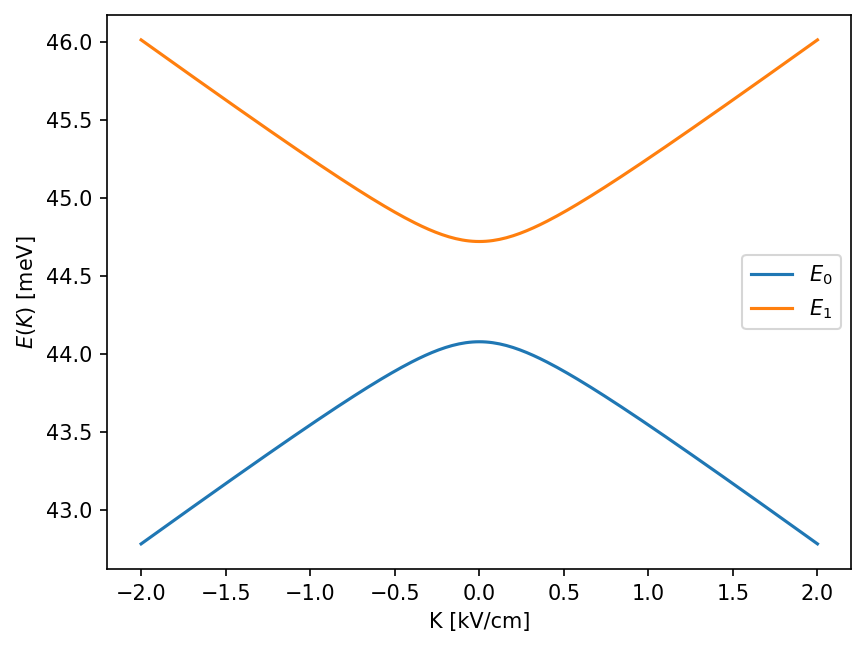

0.643047266100764


In [129]:
from scipy.linalg import eigh
energies = [[],[],[],[]]
F_linspace = np.linspace(-2, 2, 201)/F_CONVERSION
for F in F_linspace:
    H_mat = np.zeros((n,n))
    for i in range(n):
        # diagonal
        H_mat[i,i] = 2*alpha + V_w[i] + F*xi[i]
        # above and under diagonal
        if (i > 0):
            H_mat[i-1,i] = -alpha
            H_mat[i,i-1] = -alpha

    eigvals, eigvecs = eigh(H_mat)
    for i in range(4):
        energies[i].append(eigvals[i])

plt.figure(dpi=150)
plt.plot(F_linspace*F_CONVERSION, np.array(energies[0])*ENERGY_CONVERSION, label='$E_0$')
plt.plot(F_linspace*F_CONVERSION, np.array(energies[1])*ENERGY_CONVERSION, label='$E_1$')
plt.ylabel('$E(K)$ [meV]')
plt.xlabel('K [kV/cm]')
plt.legend()
plt.show()
print((energies[1][100]-energies[0][100])*ENERGY_CONVERSION)

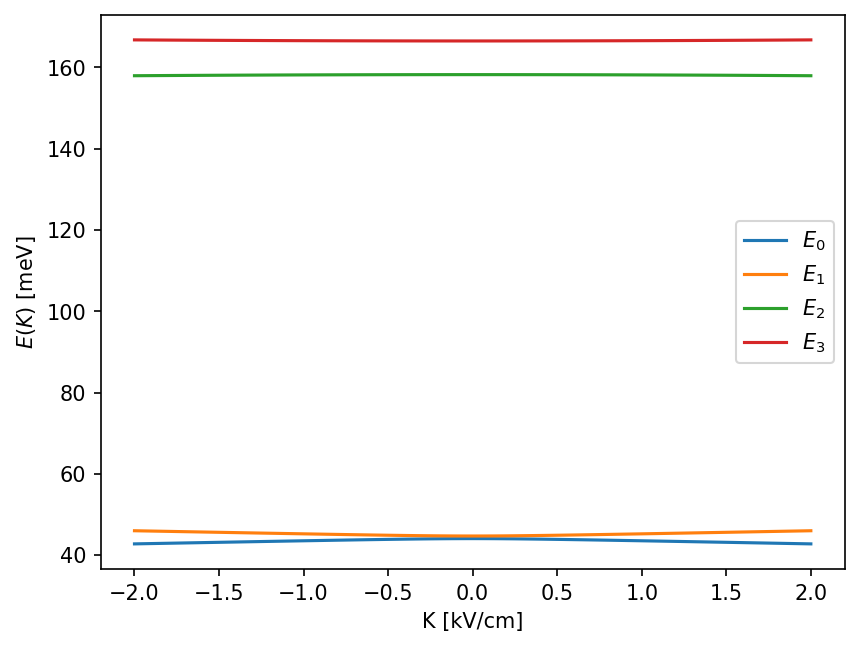

In [121]:
plt.figure(dpi=150)
plt.plot(F_linspace*F_CONVERSION, np.array(energies[0])*ENERGY_CONVERSION, label='$E_0$')
plt.plot(F_linspace*F_CONVERSION, np.array(energies[1])*ENERGY_CONVERSION, label='$E_1$')
plt.plot(F_linspace*F_CONVERSION, np.array(energies[2])*ENERGY_CONVERSION, label='$E_2$')
plt.plot(F_linspace*F_CONVERSION, np.array(energies[3])*ENERGY_CONVERSION, label='$E_3$')
plt.ylabel('$E(K)$ [meV]')
plt.xlabel('K [kV/cm]')
plt.legend()
plt.show()